In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import re

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [159]:
pvapp_df = pd.read_csv(r'C:\Users\sashi\OneDrive\Desktop\Credit EDA\previous_application.csv')

pvapp_df.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
pvapp_df.shape

(1670214, 37)

In [161]:
#Calculate percentage of missing value in each column

round(pvapp_df.isnull().sum()/len(pvapp_df)*100,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [162]:
# Dropping columns with more than 40% null values
pvapp_df=pvapp_df.loc[:,round(pvapp_df.isnull().sum()/len(pvapp_df)*100,2)<40]
pvapp_df.shape

(1670214, 26)

In [163]:
pvapp_df.head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


### Selecting Columns from the dataframe for our analysis.

Now we will select columns from the dataframe which will be used for further analysis. We will look at each column of the dataframe and their descriprition from the available data dictionary. Then will decide which columns could be a factor deciding the applicant credit worthy or not.

We have selected the following columns for our analysis.

1. SK_ID_PREV 
2. SK_ID_CURR
3. NAME_CONTRACT_TYPE
4. AMT_CREDIT
5. NAME_CASH_LOAN_PURPOSE
6. NAME_CONTRACT_STATUS
7. NAME_PAYMENT_TYPE
8. NAME_CLIENT_TYPE
9. NAME_PORTFOLIO
10. CHANNEL_TYPE
11. NAME_SELLER_INDUSTRY
12. CNT_PAYMENT
13. PRODUCT_COMBINATION

In [164]:
pvapp_df1 = pvapp_df[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_CREDIT','NAME_CASH_LOAN_PURPOSE',
                   'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO',
                   'CHANNEL_TYPE','NAME_SELLER_INDUSTRY','CNT_PAYMENT','PRODUCT_COMBINATION']]

pvapp_df1.head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,XAP,Approved,Cash through the bank,Repeater,POS,Country-wide,Connectivity,12.0,POS mobile with interest
1,2802425,108129,Cash loans,679671.0,XNA,Approved,XNA,Repeater,Cash,Contact center,XNA,36.0,Cash X-Sell: low
2,2523466,122040,Cash loans,136444.5,XNA,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,12.0,Cash X-Sell: high
3,2819243,176158,Cash loans,470790.0,XNA,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,12.0,Cash X-Sell: middle
4,1784265,202054,Cash loans,404055.0,Repairs,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,24.0,Cash Street: high
5,1383531,199383,Cash loans,340573.5,Everyday expenses,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,18.0,Cash X-Sell: low
6,2315218,175704,Cash loans,0.0,XNA,Canceled,XNA,Repeater,XNA,Credit and cash offices,XNA,NaN,Cash
7,1656711,296299,Cash loans,0.0,XNA,Canceled,XNA,Repeater,XNA,Credit and cash offices,XNA,NaN,Cash
8,2367563,342292,Cash loans,0.0,XNA,Canceled,XNA,Repeater,XNA,Credit and cash offices,XNA,NaN,Cash
9,2579447,334349,Cash loans,0.0,XNA,Canceled,XNA,Repeater,XNA,Credit and cash offices,XNA,NaN,Cash


In [165]:
# Lets check the null values % in each column and see which of them can be imputed.

round(pvapp_df1.isnull().sum()/len(pvapp_df1)*100,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_CREDIT                 0.00
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
NAME_PAYMENT_TYPE          0.00
NAME_CLIENT_TYPE           0.00
NAME_PORTFOLIO             0.00
CHANNEL_TYPE               0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
PRODUCT_COMBINATION        0.02
dtype: float64

There are two columns.

1. CNT_PAYMENT : This can be imputed with the Mean of the total column
2. PRODUCT_COMBINATION : The Null values can be removed since it is a very low percentage. It wont have any impact on our analysis.

In [166]:
#Imputing Null values in the column CNT_PAYMENT

pvapp_df1['CNT_PAYMENT'] = pvapp_df1['CNT_PAYMENT'].fillna(pvapp_df1['CNT_PAYMENT'].mode()[0])

pvapp_df1.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,XAP,Approved,Cash through the bank,Repeater,POS,Country-wide,Connectivity,12.0,POS mobile with interest
1,2802425,108129,Cash loans,679671.0,XNA,Approved,XNA,Repeater,Cash,Contact center,XNA,36.0,Cash X-Sell: low
2,2523466,122040,Cash loans,136444.5,XNA,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,12.0,Cash X-Sell: high
3,2819243,176158,Cash loans,470790.0,XNA,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,12.0,Cash X-Sell: middle
4,1784265,202054,Cash loans,404055.0,Repairs,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,24.0,Cash Street: high


In [167]:
#Removing Nan from AMT_CREDIT

pvapp_df1 = pvapp_df1.dropna(axis=0, how="any")
pvapp_df.head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [168]:
#Removing invalid values so that our analysis project correct information.

pvapp_df3 = pvapp_df1.loc[~pvapp_df1['NAME_CASH_LOAN_PURPOSE'].isin(['XNA','XNA','XAP'])]
pvapp_df2 = pvapp_df2.loc[~pvapp_df2['NAME_PAYMENT_TYPE'].isin(['XNA','XNA','XAP'])]
pvapp_df2 = pvapp_df2.loc[~pvapp_df2['NAME_PORTFOLIO'].isin(['XNA','XNA','XAP'])]
pvapp_df2 = pvapp_df2.loc[~pvapp_df2['NAME_SELLER_INDUSTRY'].isin(['XNA','XNA','XAP'])]



pvapp_df2.shape

(4828, 13)

In [169]:
pvapp_df1.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NAME_CONTRACT_TYPE         object
AMT_CREDIT                float64
NAME_CASH_LOAN_PURPOSE     object
NAME_CONTRACT_STATUS       object
NAME_PAYMENT_TYPE          object
NAME_CLIENT_TYPE           object
NAME_PORTFOLIO             object
CHANNEL_TYPE               object
NAME_SELLER_INDUSTRY       object
CNT_PAYMENT               float64
PRODUCT_COMBINATION        object
dtype: object

### Univariate Analysis

In [170]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(pvapp_df1))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

In [171]:
#Checking for outliers in AMT_CREDIT

pvapp_df1["AMT_CREDIT"].describe()

count    1.669867e+06
mean     1.961547e+05
std      3.185951e+05
min      0.000000e+00
25%      2.419200e+04
50%      8.055000e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [172]:
#Removing outliers in AMT_CREDIT
q = pvapp_df1["AMT_CREDIT"].quantile(0.995)
pvapp_df1 = pvapp_df1[pvapp_df1["AMT_CREDIT"] < q]
pvapp_df1["AMT_CREDIT"].describe()

count    1.661057e+06
mean     1.853940e+05
std      2.815503e+05
min      0.000000e+00
25%      2.390850e+04
50%      7.945200e+04
75%      2.100600e+05
max      1.799608e+06
Name: AMT_CREDIT, dtype: float64

We have removed the outlier. Lets plot the graph now.

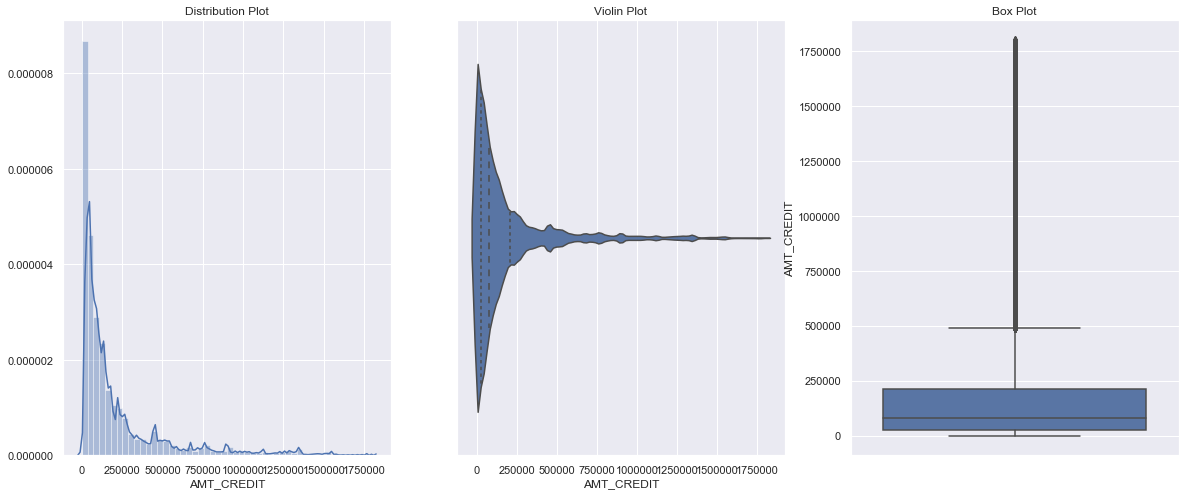

In [173]:
#reviewing the catagory AMT_CREDIT

univariate(df=pvapp_df1,col='AMT_CREDIT',vartype=0)

### Insight:
As we can see above most of the loans are distributed between Rs.100000 to Rs.250000. 

In [174]:
#checking for outliers in CNT_PAYMENT
pvapp_df1["CNT_PAYMENT"].describe()


count    1.661057e+06
mean     1.495203e+01
std      1.266330e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

Clearly the max value is way bigger than the average value. Lets remove it.

In [175]:
#Removing outliers in AMT_CREDIT

q = pvapp_df1["CNT_PAYMENT"].quantile(0.995)
pvapp_df1 = pvapp_df1[pvapp_df1["CNT_PAYMENT"] < q]
pvapp_df1["CNT_PAYMENT"].describe()

count    1.613047e+06
mean     1.360978e+01
std      1.013783e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.200000e+01
max      5.900000e+01
Name: CNT_PAYMENT, dtype: float64

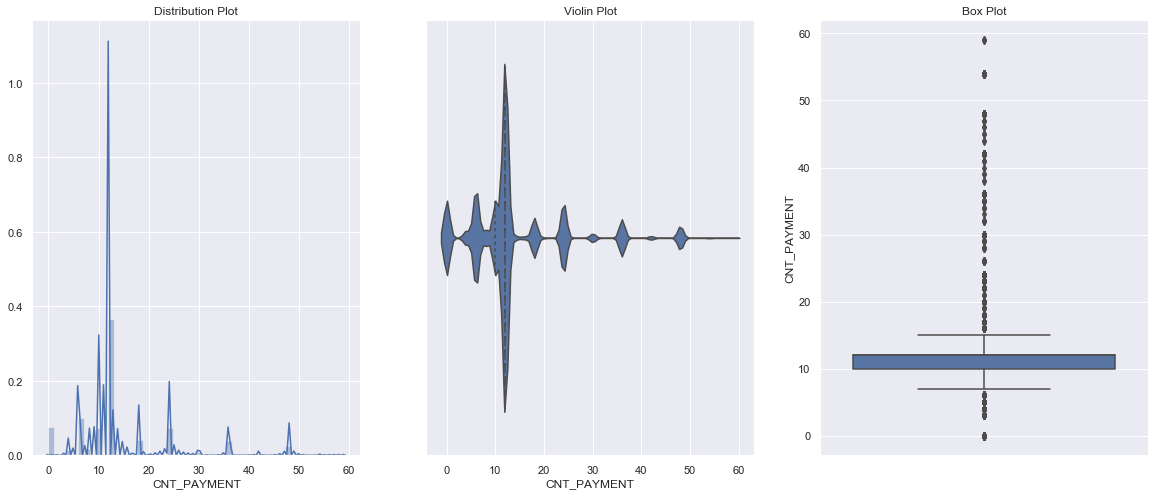

In [176]:
#reviewing the catagory CNT_PAYMENT

univariate(df=pvapp_df1,col='CNT_PAYMENT',vartype=0)

### Insight:

The term of previous year mostly lies between 5 to 15 years. 


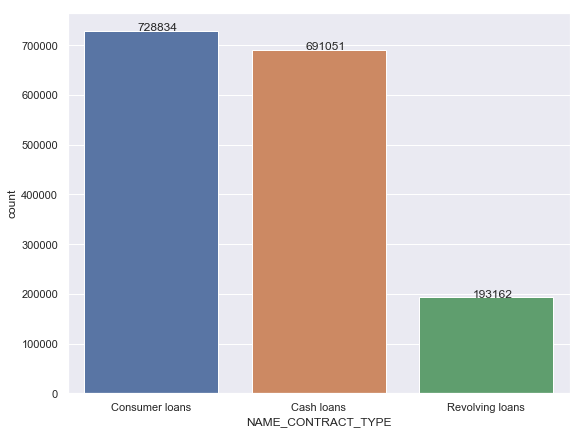

In [177]:
# Plotting for categorical variable NAME_CONTRACT_TYPE

univariate(df=pvapp_df1,col='NAME_CONTRACT_TYPE',vartype=1)

### Insights:
For the above plot we can see that around 44% are Consumer loans, 41% are Cash loans and 15% are Revolving loans. 



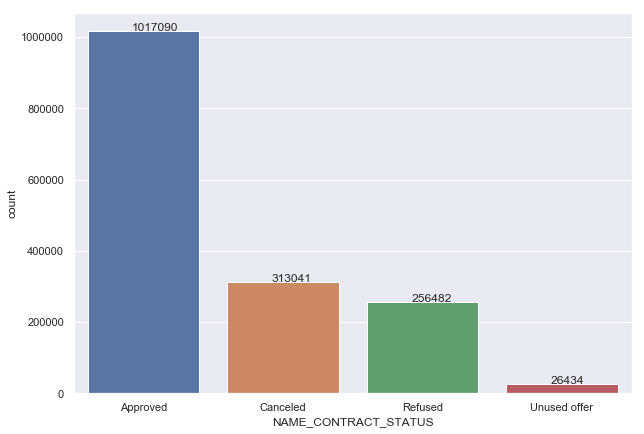

In [178]:
#Reviewing NAME_CONTRACT_STATUS

univariate(df=pvapp_df1,col='NAME_CONTRACT_STATUS',vartype=1)

### Insight
From above plot we can see that around 60% loans are approved and and 15% are Refused.

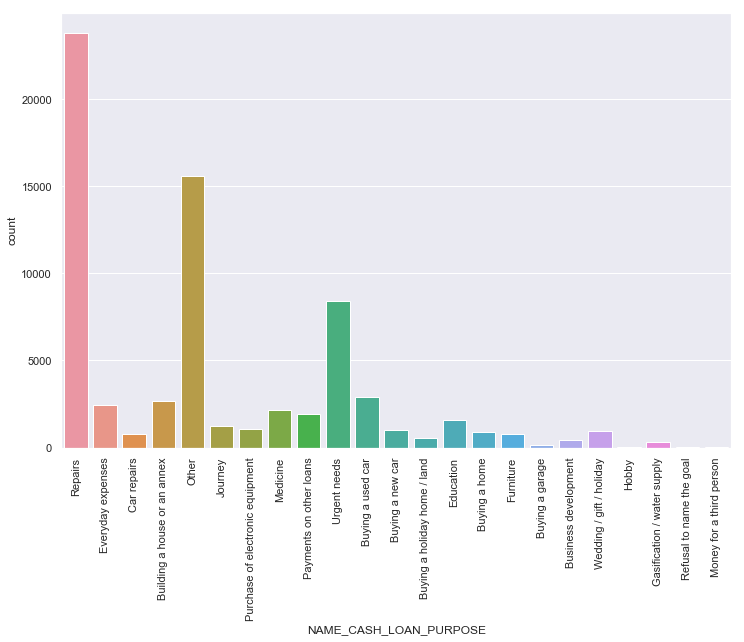

In [179]:
# Reviewing NAME_CASH_LOAN_PURPOSE

#univariate(df=pvapp_df3,col='NAME_CASH_LOAN_PURPOSE',vartype=1)

plt.figure(figsize=(12,8))

sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data = pvapp_df3)
plt.xticks(rotation = 90)

plt.show()

### Insight:

As we can see above most of the people avail a loan for 'Repairs' Purpose.


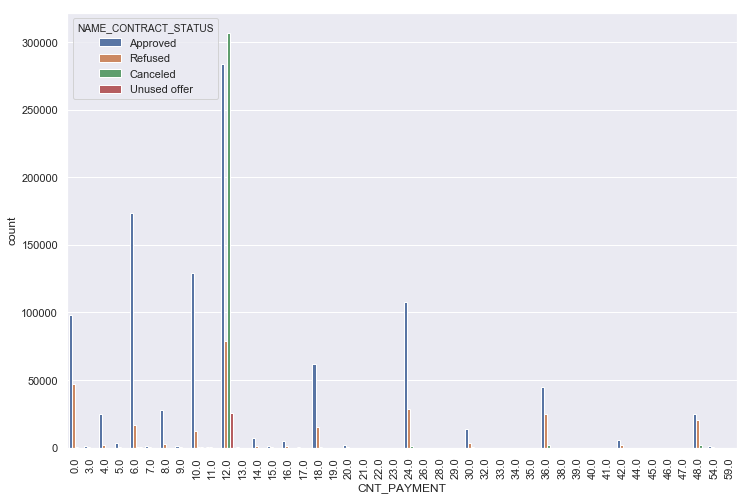

In [180]:
# Comparing Loan term and amount.

#univariate(df=pvapp_df1,col='CNT_PAYMENT',vartype=1,hue='NAME_CONTRACT_STATUS')

plt.figure(figsize=(12,8))

sns.countplot(x='CNT_PAYMENT',hue='NAME_CONTRACT_STATUS',data = pvapp_df1)
plt.xticks(rotation = 90)

plt.show()

### Insight
From the above plot we see that if loan term is more than 24 months, then it is more likely to be rejected.

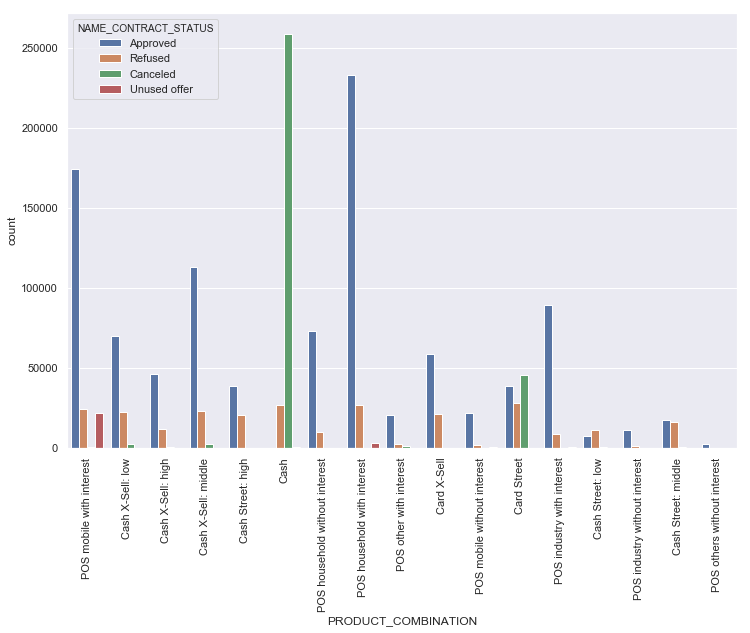

In [181]:
# Reviewing PRODUCT_COMBINATION with NAME_CONTRACT_STATUS

plt.figure(figsize=(12,8))

sns.countplot(x='PRODUCT_COMBINATION',hue='NAME_CONTRACT_STATUS',data = pvapp_df1)
plt.xticks(rotation = 90)

plt.show()

### Insight:

Top three product combination which got approved are,
1. POS Household with interest
2. POS Mobile with interest
3. Cash X-sell: Middle.

### Bivariate Analysis.


In [182]:
pvapp_df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,XAP,Approved,Cash through the bank,Repeater,POS,Country-wide,Connectivity,12.0,POS mobile with interest
1,2802425,108129,Cash loans,679671.0,XNA,Approved,XNA,Repeater,Cash,Contact center,XNA,36.0,Cash X-Sell: low
2,2523466,122040,Cash loans,136444.5,XNA,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,12.0,Cash X-Sell: high
3,2819243,176158,Cash loans,470790.0,XNA,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,12.0,Cash X-Sell: middle
4,1784265,202054,Cash loans,404055.0,Repairs,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,XNA,24.0,Cash Street: high


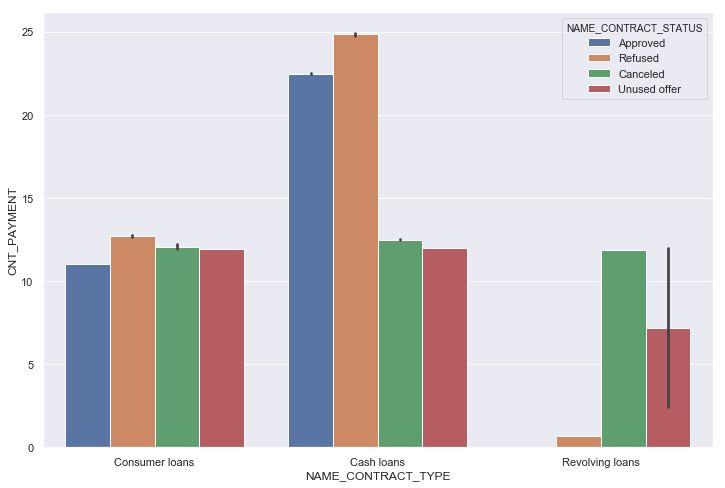

In [183]:
#Reviewing CNT_PAYMENT vs NAME_CONTRACT_TYPE

plt.figure(figsize=(12,8))

sns.barplot(x = 'NAME_CONTRACT_TYPE',y = 'CNT_PAYMENT',hue = 'NAME_CONTRACT_STATUS',data = pvapp_df1)
#plt.xticks(rotation=90)

plt.show()


### Insight:

From the graph it is clear that Cash lone for terms more than 30 years were rejected. While Revolving loan for the term of less than 5 years was rejected 

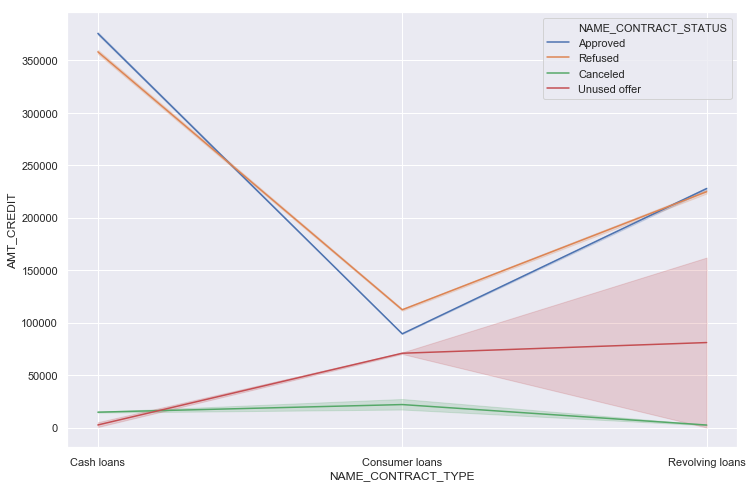

In [184]:
#Reviewing AMT_CREDIT vs NAME_CONTRACT_TYPE

plt.figure(figsize=(12,8))

sns.lineplot(x = 'NAME_CONTRACT_TYPE',y = 'AMT_CREDIT',hue = 'NAME_CONTRACT_STATUS',data = pvapp_df1)
#plt.xticks(rotation=90)

plt.show()


### Insight:
Cash loans of amount more than 5lacs were rejected.
Comsumer loans of amount more than 3lacs were rejected.
Revolving loans of  of amount more than 2lacs were rejected.
Intresting thing is most revolving loans were unused.

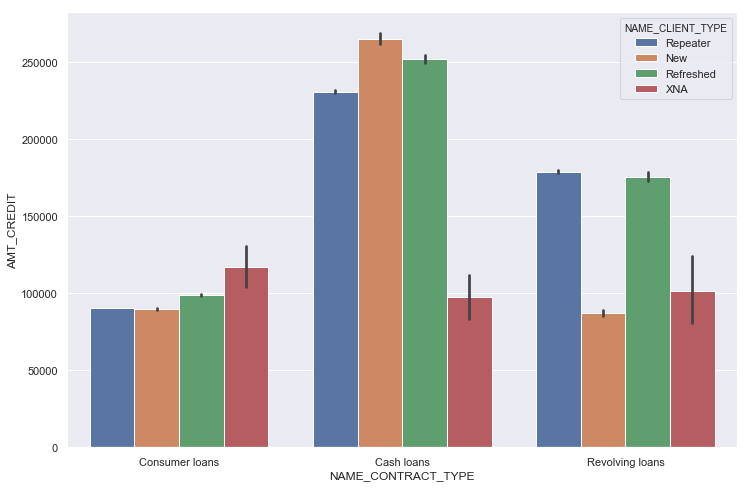

In [185]:
#Reviewing NAME_CONTRACT_TYPE vs AMT_CREDIT

plt.figure(figsize=(12,8))

sns.barplot(x = 'NAME_CONTRACT_TYPE',y = 'AMT_CREDIT',hue = 'NAME_CLIENT_TYPE',data = pvapp_df1)
#plt.xticks(rotation=90)

plt.show()

### Insight:
1. Most repeaters opt for Cash loan than Consumer loans and revolving loans. 

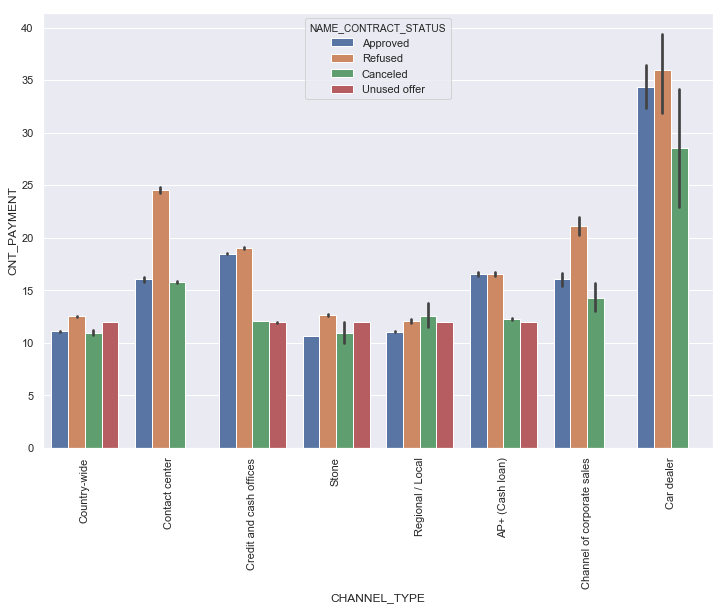

In [186]:
#Reviewing AMT_CREDIT vs NAME_CONTRACT_TYPE

plt.figure(figsize=(12,8))

sns.barplot(x = 'CHANNEL_TYPE',y = 'CNT_PAYMENT',hue = 'NAME_CONTRACT_STATUS',data = pvapp_df1)
plt.xticks(rotation=90)

plt.show()

### Insights:

1. Term of most loans which come via Car dealer were more than 50 years.
2. Loans of less term came from channel type Stone.